<a href="https://colab.research.google.com/github/MukRodrigues/Simulacao-difusao-reacao/blob/main/GITHUB_Sympy_Simulacao_equacao_difusao_reacao_malthusiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# pacotes e funções usados
import numpy as np
from sympy import exp, sin, cos, pi, integrate, symbols, Sum, Piecewise, lambdify
import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting import plot, plot3d

In [4]:
# variáveis
x, y, t = symbols('x y t')  #reais
n = symbols('n', positive=True, integer=True)  #inteira positiva

## Simulação


Vamos plotar o gráfico da solução

$$
    \rho(x, t) =   \ \sum_{n=1} Cn \ \text{sen} \left(\frac{n \pi}{L}x \right) \
  { e^{  D_0 t \left[    \frac{R(t)}{t} - \left(\frac{n \pi}{L} \right)^2    \right] }}
$$


\\
$$
      Cn = \begin{cases} \displaystyle  \frac{2 N_0 }{L( b-a)} \int_{a} ^{b}  \text{sen} \left(\frac{n \pi}{L} x \right) \ dx\ , se \ x \in [a,b] \subset (0,L) \\
      \\
      0, \ \text{caso contrário}.    
      \end{cases}         
$$

### Função de crescimento

\\
$$
R(t) = r_1 t + \frac{r_2 p}{2 \pi} \left[ 1 - \text{cos}   \left ( \frac{2 \pi t}{p} \right )\right]   
$$

In [17]:
# parâmetros
L = 5  #tamanho do intervalo
T = 20  #tempo final
N0 = 10  #populacao inicial

#parametros
D0 = 1.5
r1 = 0.5  #taxa basica de reprodução, quanto maior r1, maior será R
r2 = 0.2  #oscilação da reprodução
p = T/5  # periodo da reproducao

#funções
R = r1*t + (r2*p)/(2*pi)*(1 - cos(2*pi*t/p))
fcresc = exp(R)

tempo = exp( D0* (R- t*(n*pi/L)**2 ))  #funcao exponencial da solução rho

### Solução

#### Coeficiente de Fourier

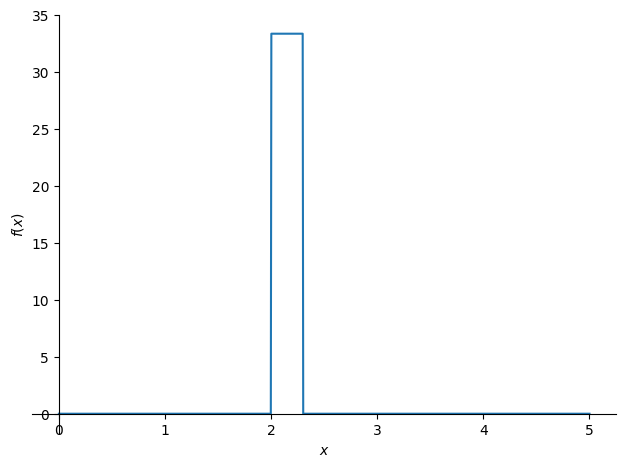

In [19]:
x_sym = symbols('x')
a = 2   #definir o intervalor [a,b] C (0,L)
b = 2.3

rho_zero = Piecewise((N0 / (b - a), (x_sym >= a) & (x_sym <= b)), (0, True))  #define cond. inicial para ser nula se x não estiver em [a,b]

plot(rho_zero, (x,0,5))   #plot pra ajudar na visualização da cond. inicial
plt.show()

In [20]:
Cn = (2/L ) * sp.integrate(rho_zero*sp.sin(n*pi*x/L), (x,0,L) )  #coef. de fourier
#Cn

#### Densidade

$$
    \rho(x, t) =   \ \sum_{n=1} Cn \ \text{sen} \left(\frac{n \pi}{L}x \right) \
  { e^{  D_0  \left[    R(t) - t\left(\frac{n \pi}{L} \right)^2    \right] }}
$$


In [23]:
rho = Sum(Cn* sin(n*pi/L * x)  * tempo, (n,1,50))  #somas de rho_n indo de n=1 até n=50 (nesse caso)

#### Gráfico

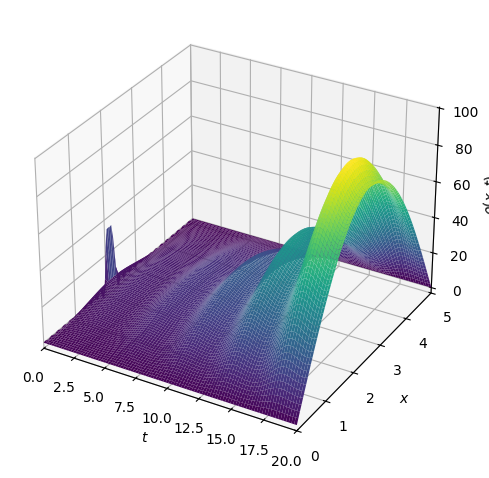

In [31]:
grafico = plot3d(rho, (t,0,20), (x,0,L), zlabel='$\\rho(x,t)$')
plt.show()

In [32]:
# para salvar o gráfico só tirar o hashtag da linha abaixo
#grafico.fig.savefig('meta_difusao_cte_crescimento.png')